# Homework 6: Hypothesis Testing and Permutation Testing

## Due Tuesday, November 26th at 11:59PM

Welcome to Homework 6, the last homework of the quarter! This homework covers hypothesis testing ([CIT 11](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)) and permutation testing ([CIT 12](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)).

### Instructions

You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

In [1]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

## 1. Was it by Random Chansey? 🎲

<img src='images/chansey.png' width='250'>

You recently decided to buy the video game *Pokémon Yellow* from someone on Ebay. The seller tells you that they've modified the game so that the probabilities of encountering certain Pokémon in certain locations have been altered. However, the seller doesn't tell you which specific locations have had their probability models changed and what they've been changed to.

As you are playing *Pokémon Yellow*, you arrive at the Safari Zone, one of the most iconic locations in the game. You're curious as to your chances of encountering your favorite Pokémon, Chansey, in this location. You go onto [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Kanto_Safari_Zone#Area_1) to find the probability model for this location, and you discover that for each Pokémon encounter in the Safari Zone, there is a 4% chance of encountering Chansey. 

After a few hours of gameplay in the Safari Zone, you have encountered Chansey **48 times out of 821 total Pokémon encounters**, which is almost 6% of the time! You start to suspect that the Safari Zone may have been one of the locations in which the previous owner of the game changed the probability model.

To test this, you decide to run a hypothesis test with the following hypotheses:

- **Null Hypothesis**: In your copy of *Pokémon Yellow*, the probability of encountering Chansey at each Pokémon encounter in the Safari Zone is 4%. 

- **Alternative Hypothesis**: In your copy of *Pokémon Yellow*, the probability of encountering Chansey at each Pokémon encounter in the Safari Zone is greater than 4%.

**Question 1.1.** Complete the implementation of the function `one_simulation`, which has no arguments. It should randomly generate 821 Pokémon encounters in the Safari Zone and return the **proportion** of encountered Pokémon that were Chansey. 

***Hint:*** Use `np.random.multinomial`. You don't need a `for`-loop.

In [2]:
def one_simulation():
    probabilities = [0.04, 0.96]
    encounter = np.random.multinomial(821, probabilities)
    
    chansey_count = encounter[0]
    chansey_prop = chansey_count / 821
    
    return chansey_prop
    
one_simulation()

0.03654080389768575

In [3]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** The test statistic for our hypothesis test will be the difference between the proportion of Chansey encounters in a given sample of 821 Safari Zone encounters and the expected proportion of Chansey encounters, i.e.

$$\text{test statistic} = \text{proportion of Chansey encounters in sample} - 0.04$$


Let's conduct 10,000 simulations. Create an array named `proportion_diffs` containing 10,000 simulated values of the test statistic described above. Utilize the function created in the previous question to perform this task.

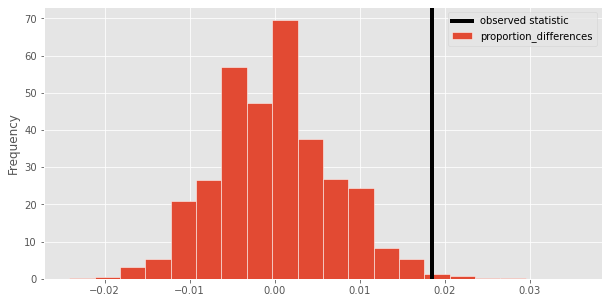

In [4]:
proportion_diffs = []

for i in range(10000):
    simulated_prop = one_simulation()
    test_statistic = simulated_prop - 0.04
    proportion_diffs.append(test_statistic)
    
proportion_diffs = np.array(proportion_diffs)

# Visualize with a histogram. Don't change anything below.
bpd.DataFrame().assign(proportion_differences=proportion_diffs).plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5));
plt.axvline(x=(48 / 821 - 0.04), color='black', linewidth=4, label='observed statistic')
plt.legend();

In [5]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Calculate the p-value for this hypothesis test, and assign the result to `safari_zone_p`.

***Hint:*** Do large values of our test statistic favor the alternative hypothesis, or do small values of our test statistic favor the alternative hypothesis?

In [6]:
observed_proportion = 48 / 821
observed_test_statistic = observed_proportion - 0.04

safari_zone_p = np.count_nonzero(proportion_diffs >= observed_test_statistic) / len(proportion_diffs)
safari_zone_p

0.0072

In [7]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Using the standard p-value cutoff of 0.05, what can we conclude from our hypothesis test? Assign either 1, 2, 3, or 4 to the variable `safari_zone_conclusion`, corresponding to the best conclusion.
   
   1. We reject the null hypothesis. There is not enough evidence to say that the observed data is inconsistent with the model.
   1. We reject the null hypothesis. The observed data is inconsistent with the model.
   1. We accept the null hypothesis. The observed data is consistent with the model.
   1. We fail to reject the null hypothesis. There is not enough evidence to say that the observed data is inconsistent with the model.

In [8]:
safari_zone_conclusion = 2

In [9]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** In this question, we chose as our test statistic the proportion of Chansey encounters in the Safari Zone minus 0.04. But this is not the only statistic we could have chosen; there are many that could have worked here. 

From the options below, choose the test statistic that would **not** have worked for this hypothesis test, and assign 1, 2, 3, or 4 to the variable `bad_choice`.

1. The number of Chansey encounters out of 821 enounters in the Safari Zone.
1. The proportion of Chansey encounters in the Safari Zone.
1. 0.04 minus the proportion of Chansey encounters in the Safari Zone.
1. The absolute difference between 0.04 and the proportion of Chansey encounters in the Safari Zone.

***Hint:*** Our goal is to find a test statistic that will help us determine whether we encounter Chansey **more** often than expected.

In [10]:
bad_choice = 4
bad_choice

4

In [11]:
grader.check("q1_5")

q1_5 results: All test cases passed!

## 2. Let's Roll 🍣🍥🥢

As some of you may know, [The Bistro](https://hdh-web.ucsd.edu/dining/apps/diningservices/Restaurants/Venue_V3?locId=27&subLoc=00&locDetID=13&dayNum=0) is a popular specialty dining hall on campus located in Seventh College, which serves many types of sushi rolls. Our DSC 10 tutor, Daniel, is a big fan of The Bistro and spends a lot of time there. He proposes the following probability distribution for how frequently each type of sushi roll is ordered, based on his own observations. Note that the sum of the estimated probabilities is 1.

| Type | Daniel's Estimated Probability|
| --- | --- |
| Cucumber Avocado Roll | $0.08$ |
| Seared Tuna Roll | $0.09$ |
| Spicy Tuna Roll | $0.08$ |
| Horizon Roll | $0.11$ |
| The OC Roll | $0.15$ |
| Rainbow Roll | $0.12$ |
| Sun God Roll| $0.16$ |
| Dragon Roll|$0.09$|
| Crunchy Roll| $0.12$|

We'll store this **proposed** distribution in an array, in the order shown above.

In [12]:
# Just run this cell, do not change it!
proposed_dist = np.array([0.08, 0.09, 0.08, 0.11, 0.15, 0.12, 0.16, 0.09, 0.12])
proposed_dist

array([0.08, 0.09, 0.08, 0.11, 0.15, 0.12, 0.16, 0.09, 0.12])

To assess the validity of Daniel's model, you collect data directly from The Bistro. You learn that their last 1,000 sushi orders were as follows:
- 85 `'Cucumber Avocado Roll'`
- 83 `'Seared Tuna Roll'`
- 90 `'Spicy Tuna Roll'`
- 104 `'Horizon Roll'`
- 162 `'The OC Roll'`
- 112 `'Rainbow Roll'`
- 145 `'Sun God Roll`
- 115 `'Dragon Roll` 
- 104 `'Crunchy Roll`

You then calculate the **observed** distribution using the data you collected and store it in an array as well (in the same order as before):

In [13]:
# Just run this cell, do not change it!
observed_dist = np.array([85, 83, 90, 104, 162, 112, 145, 115, 104]) / 1000
observed_dist

array([0.085, 0.083, 0.09 , 0.104, 0.162, 0.112, 0.145, 0.115, 0.104])

While `observed_dist` is not identical to `proposed_dist`, it's still possible that Daniel's model is plausible, and that the differences are simply due to random chance. Let's run a hypothesis test to investigate further, using the following hypotheses: 

- **Null Hypothesis**: Sushi orders at The Bistro are randomly drawn from the distribution `proposed_dist`.

- **Alternative Hypothesis**: Sushi orders at The Bistro are _not_ drawn randomly from the distribution `proposed_dist`.

Note that this hypothesis test involves nine proportions, one for each type of sushi.

**Question 2.1.**  Which of the following is **not** a reasonable choice of test statistic for this hypothesis test? Assign 1, 2, or 3 to the variable `unreasonable_test_statistic`. 
1. The sum of the absolute difference between the proposed distribution (Daniel's expected proportion of types) and the observed distribution (actual proportion of types).
1. The absolute difference between the sum of the proposed distribution (Daniel's expected proportion of types) and the sum of the observed distribution (actual proportion of types).
1. Among all nine sushi types, the largest absolute difference between Daniel's expected proportion and the actual proportion of sushi of that type.

In [14]:
unreasonable_test_statistic = 2

In [15]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** We'll use the TVD, i.e. **total variation distance**, as our test statistic. Below, complete the implementation of the function `total_variation_distance`, which takes as input two distributions (stored as arrays) and returns the total variation distance between those distributions.

Then, use the function `total_variation_distance` to determine the TVD between the type distribution proposed by Daniel and the observed distribution of types. Assign this TVD to `observed_tvd`.

In [16]:
def total_variation_distance(first_distrib, second_distrib):
    '''Computes the total variation distance between two distributions.'''
    abs_differences = np.abs(first_distrib - second_distrib)
    
    tvd = 0.5 * np.sum(abs_differences) # sum of abs differences and divide by two
    return tvd

observed_tvd = total_variation_distance(proposed_dist, observed_dist)
observed_tvd

0.05200000000000001

In [17]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Now, we'll calculate 3,000 simulated TVDs to see what a typical TVD between the proposed distribution and a simulated distribution would look like if Daniel's model were accurate. Since our real-life data includes 1000 sushi orders, in each trial of the simulation, we'll:
- draw 1000 sushi orders at random from Daniel's proposed distribution, then 
- calculate the TVD between **Daniel's proposed type distribution** and the **type distribution from the simulated sample**. 

Store these 3,000 simulated TVDs in an array called `simulated_tvds`.

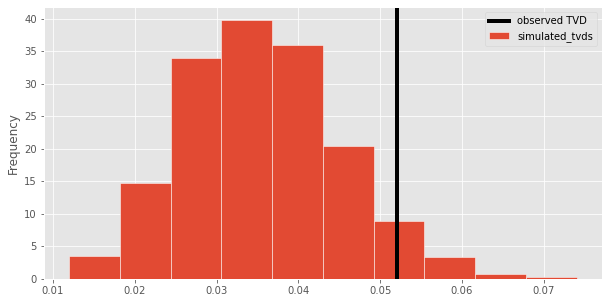

In [18]:
simulated_tvds = []

for i in range(3000):
    simulated_counts = np.random.multinomial(1000, proposed_dist)
    
    simulated_proportions = simulated_counts / 1000

    tvd = total_variation_distance(proposed_dist, simulated_proportions)

    simulated_tvds.append(tvd)

simulated_tvds = np.array(simulated_tvds)

# Visualize the distribution of TVDs with a histogram
bpd.DataFrame().assign(simulated_tvds=simulated_tvds).plot(kind='hist', density=True, ec='w', figsize=(10, 5));
plt.axvline(x=observed_tvd, color='black', linewidth=4, label='observed TVD')
plt.legend();

In [19]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** Now, determine the p-value for our test by finding the proportion of times in our simulation that we saw a TVD greater than or equal to our observed TVD. Assign your result to `sushi_p`.

In [20]:
sushi_p = np.count_nonzero(simulated_tvds >= observed_tvd) / len(simulated_tvds)
sushi_p

0.048666666666666664

In [21]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Using the p-value cutoff of 0.01, what can we conclude from our hypothesis test? Assign either 1, 2, 3, or 4 to the variable `sushi_conclusion`, corresponding to the best conclusion.
   
   1. We accept the null hypothesis. The observed data is consistent with the model.
   1. We reject the null hypothesis. There is not enough evidence to say if the observed data is consistent with the model.
   1. We reject the null hypothesis. The observed data is inconsistent with the model.
   1. We fail to reject the null hypothesis. There is not enough evidence to say that the observed data is inconsistent with the model.

In [22]:
sushi_conclusion = 4
sushi_conclusion

4

In [23]:
grader.check("q2_5")

q2_5 results: All test cases passed!

## 3. Chocolate 🍫😋
<img src='images/chocolate_bars.png' width='1000'>

Chocolate is a well-loved treat that many enjoy, but some people take their chocolate very seriously. [The Manhattan Chocolate Society](https://flavorsofcacao.com/mcs_index.html) is an invitation-only society founded to taste and review chocolate bars from around the world. The [Flavors of Cacao database](https://flavorsofcacao.com/index.html) was born from tastings done by this exclusive society, and it contains reviews of almost 2,700 different dark chocolate bars. Which dark chocolate bars do these connoisseurs consider to be the best? Let's find out!

Run the next cell to load in the data.

In [24]:
choco = bpd.read_csv('data/chocolate.csv')
choco

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Characteristics,Rating
0,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
1,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25
2,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
3,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
4,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
...,...,...,...,...,...,...,...,...,...
2688,Zotter,Austria,2011,Peru,Peru,70%,"4- B,S*,C,Sa","creamy, fatty, mild nutty",3.75
2689,Zotter,Austria,2011,India,Kerala State,65%,"4- B,S*,C,Sa","creamy, masculine, earthy",3.50
2690,Zotter,Austria,2011,India,Kerala State,62%,"4- B,S*,C,Sa","oily, subdued, caramel, salt",3.25
2691,Zotter,Austria,2011,Congo,Congo,65%,"4- B,S*,C,Sa","dairy, salt, caramel",3.00


We will primarily be working with the `'Characteristics'` and `'Rating'` columns. The `'Rating'` column contains a score from 1 to 5. According to Flavors of Cacao, each rating can be interpreted as follows:

| Rating | Meaning |
| ------ | ------- |
| 4.0 - 5.0  | Outstanding |
| 3.5 - 3.9  | Highly Recommended |
| 3.0 - 3.49 | Recommended |
| 2.0 - 2.9  | Disappointing |
| 1.0 - 1.9  | Unpleasant |

Ratings are determined by a combination of factors including flavor, texture, and "aftermelt", or the lingering experience after the chocolate has melted in your mouth.

The `'Characteristics'` column contains the *most memorable characteristics* of each chocolate bar. Each bar may have several memorable characteristics, separated by a comma. For example, the chocolate bar at the last index of the DataFrame was memorable for its woody flavor and butterscotch notes.

Compared to other types of chocolate, dark chocolate tends to be less sweet. However, quite a few of the chocolate bars in the DataFrame above were memorable for being sweet. How do sweet dark chocolate bars get rated relative to non-sweet dark chocolate bars? In this section, we will explore whether the ratings for sweet chocolate bars come from the same distribution as non-sweet chocolate bars. 

**Question 3.1.** Complete the implementation of the function `label_sweet`, which takes in a string of characteristics associated with a single row of `choco` and returns one of two strings. If `'sweet'` is among these characteristics, then the function should return `'Sweet'`, otherwise it should return `'Not Sweet'`.

Once you've done that, use your function to help you create a new DataFrame named `labeled` that has all the same columns as `choco`, in the same order, with an additional column named `'Sweetness'` that contains whether the chocolate bar is characterized as sweet. The `'Sweetness'` column should contain only two distinct values: `'Sweet'` and `'Not Sweet'`.

***Note:*** Some chocolate bars may have characteristics where `'sweet'` is contained within a word, such as `'bittersweet'`. For this question, we only want to identify bars where a characteristic is `'sweet'` itself. For example, `label_sweet('nutty, bittersweet, chalky')` should evaluate to `'Not Sweet'`.

In [25]:
def label_sweet(characteristics): 
    filter = characteristics.split(', ')
    
    if 'sweet' in filter:
        return 'Sweet'
    else:
        return 'Not Sweet'
    
labeled = choco.assign(Sweetness = choco.get('Characteristics').apply(label_sweet))
labeled

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Characteristics,Rating,Sweetness
0,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50,Not Sweet
1,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25,Not Sweet
2,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00,Not Sweet
3,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,Not Sweet
4,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,Not Sweet
...,...,...,...,...,...,...,...,...,...,...
2688,Zotter,Austria,2011,Peru,Peru,70%,"4- B,S*,C,Sa","creamy, fatty, mild nutty",3.75,Not Sweet
2689,Zotter,Austria,2011,India,Kerala State,65%,"4- B,S*,C,Sa","creamy, masculine, earthy",3.50,Not Sweet
2690,Zotter,Austria,2011,India,Kerala State,62%,"4- B,S*,C,Sa","oily, subdued, caramel, salt",3.25,Not Sweet
2691,Zotter,Austria,2011,Congo,Congo,65%,"4- B,S*,C,Sa","dairy, salt, caramel",3.00,Not Sweet


In [26]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Assign `chocolate` to a DataFrame with only two columns, `'Sweetness'` and `'Rating'`, since these are the only relevant columns in `labeled` to answer the question we've proposed.

In [27]:
chocolate = labeled.get(["Sweetness", "Rating"])
chocolate

,Sweetness,Rating
0,Not Sweet,3.50
1,Not Sweet,3.25
2,Not Sweet,3.00
3,Not Sweet,3.00
4,Not Sweet,3.75
...,...,...
2688,Not Sweet,3.75
2689,Not Sweet,3.50
2690,Not Sweet,3.25
2691,Not Sweet,3.00


In [28]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Using the DataFrame `chocolate`, calculate the difference between the **mean** `'Rating'` of sweet chocolate bars and non-sweet chocolate bars. Assign your answer to `observed_difference`.

$$\text{observed difference} = \text{mean rating of sweet chocolate bars} - \text{mean rating of non-sweet chocolate bars}$$

In [29]:
mean_sweet = chocolate[chocolate.get('Sweetness') == 'Sweet'].get('Rating').mean()
mean_non_sweet = chocolate[chocolate.get('Sweetness') == 'Not Sweet'].get('Rating').mean()

observed_difference = mean_sweet - mean_non_sweet
observed_difference

-0.16271384367771047

In [30]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** What does the number you obtained for `observed_difference` mean? Assign `interpretation` to 1, 2, 3, 4, 5 or 6 corresponding to the best explanation below.

1. In our sample, the mean rating for sweet chocolate bars is higher than the mean rating for non-sweet chocolate bars by about 16 percent.
1. In our sample, the mean rating for sweet chocolate bars is higher than the mean rating for non-sweet chocolate bars by about 0.16 percent.
1. In our sample, the mean rating for sweet chocolate bars is higher than the mean rating for non-sweet chocolate bars by about 0.16 rating points.
1. In our sample, the mean rating for sweet chocolate bars is lower than the mean rating for non-sweet chocolate bars by about 16 percent.
1. In our sample, the mean rating for sweet chocolate bars is lower than the mean rating for non-sweet chocolate bars by about 0.16 percent.
1. In our sample, the mean rating for sweet chocolate bars is lower than the mean rating for non-sweet chocolate bars by about 0.16 rating points.


In [34]:
interpretation = 6

In [35]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** Now we want to conduct a **permutation test** to see if sweet chocolate bars actually have a lower rating on average than non-sweet chocolate bars, or whether this was just observed in our sample by random chance.

- **Null Hypothesis**: The ratings of sweet chocolate bars and non-sweet chocolate bars come from the same distribution.  
- **Alternative Hypothesis**: The ratings of sweet chocolate bars are lower on average than the ratings of non-sweet chocolate bars.

Run a permutation test to see if the `observed_difference` you calculated in Question 3.3 is actually a statistically significant difference. Simulate 1000 values of the test statistic by shuffling the `'Sweetness'` column of `chocolate` and calculating the difference in mean rating between the two groups determined by the shuffling (again, in the order sweet minus non-sweet). Store your 1000 differences in the `differences` array. 

***Hint:*** It's a good idea to simulate one value of the test statistic before putting everything in a for-loop.

In [67]:
differences = []

for i in range(1000):
    sweetness = np.random.permutation(chocolate.get('Sweetness'))

    shuffled = chocolate.assign(Sweetness=sweetness)

    mean_sweet = shuffled[shuffled.get('Sweetness') == 'Sweet'].get('Rating').mean()
    mean_non_sweet = shuffled[shuffled.get('Sweetness') == 'Not Sweet'].get('Rating').mean()

    difference = mean_sweet - mean_non_sweet

    differences.append(difference)

differences = np.array(differences)

# Just display the first ten differences.
differences[:10]

array([-0.02376668, -0.01277086,  0.00822116,  0.01721774,  0.02221584,
        0.0002242 ,  0.040209  , -0.0297644 , -0.01377048,  0.00322306])

In [39]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.** Compute a p-value for this hypothesis test and assign your answer to `chocolate_p`. To decide whether to use `<=` or `>=` in the calculation of the p-value, think about whether larger values or smaller values of our test statistic favor the alternative hypothesis.

In [40]:
chocolate_p = np.count_nonzero(differences <= observed_difference) / len(differences)
chocolate_p

0.0

In [41]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7.** Assign the variable `chocolate_conclusion` to a **list** of all the true statements below.

1. We accept the null hypothesis at the 0.01 significance level.
1. We reject the null hypothesis at the 0.01 significance level.
1. We fail to reject the null hypothesis at the 0.01 significance level.
1. We accept the null hypothesis at the 0.05 significance level.
1. We reject the null hypothesis at the 0.05 significance level.
1. We fail to reject the null hypothesis at the 0.05 significance level.

Then, interpret your results by setting `sweeter_is_worse` to `True` or `False`, based on the outcome of your permutation test. `True` means that sweet chocolate bars actually do have lower ratings than non-sweet bars, and `False` means they do not.

In [70]:
chocolate_conclusion = [2, 5]
sweeter_is_worse = True

In [71]:
grader.check("q3_7")

q3_7 results: All test cases passed!

**Question 3.8.** Suppose in this question you had shuffled the `'Rating'` column instead and kept the `'Sweetness'` column in the same order. Assign `shuffled_rating` to either 1, 2, 3, or 4, corresponding to the true statement below.


1. The new p-value from shuffling `'Rating'` would be $1 - p$, where $p$ is the old p-value from shuffling `'Sweetness'` (i.e. your answer to Question 3.6).
1. We would need to change our null hypothesis in order to shuffle the `'Rating'` column. 
1. There would be no difference in the conclusion of the test if we had shuffled the `'Rating'` column instead.
1. The `'Rating'` column cannot be shuffled because it contains numbers.

In [44]:
shuffled_rating = 3

In [45]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9.** Which of the following choices best describes the purpose of shuffling one of the columns in our dataset in a permutation test? Assign `why_shuffle` to either 1, 2, 3, or 4, corresponding to the true statement below.

1. Shuffling mitigates noise in our data by generating new permutations of the data.
1. Shuffling is a special case of bootstrapping and allows us to produce interval estimates.
1. Shuffling allows us to generate new data under the null hypothesis, which we can use in testing our hypothesis.
1. Shuffling allows us to generate new data under the alternative hypothesis, which helps us identify when the data come from different distributions.

In [46]:
why_shuffle = 3

In [47]:
grader.check("q3_9")

q3_9 results: All test cases passed!

Feel free to explore the chocolate data some more to see if other characteristics are linked with higher or lower ratings! 

## 4. New York Times Mini Crossword 🧩🕐
<img src='images/nyt_mini_crossword.png' width='500'>

[The New York Times Mini Crossword](https://www.nytimes.com/crosswords/game/mini) is a smaller and quicker version of the traditional crossword puzzle. It features straightforward clues and is designed to be completed in a few minutes. After completing the puzzle, players have the option to send the time it took to complete the puzzle to their friends, to try to compete for the lowest time.

Ciro and Athu have been playing the New York Times Mini Crossword for a couple months, often sending each other the time it takes for them to complete each puzzle. Today, Ciro's time was much faster than Athu's so he bragged that he is better than Athu at the game. Athu vehemently disagrees and thinks that they are equally skilled.

Since the two of them have learned about hypothesis testing in DSC10, they decided to look at their history of times to determine if they were equally skilled or if one of them was better than the other.

Let's look at all the data that they collected. Each entry in the `'Time'` column represents the amount of time it took in seconds for one person to complete the New York Times Mini Crossword on a single day. There are 25 times for Ciro and 25 times for Athu.

In [48]:
mini_cw = bpd.read_csv('data/mini-crossword.csv')
mini_cw 

,Name,Time
0,Ciro,108
1,Athu,110
2,Ciro,100
3,Athu,109
4,Ciro,109
...,...,...
45,Athu,110
46,Ciro,108
47,Athu,109
48,Ciro,108


**Question 4.1.** Now let's address the question: how does the average time for Ciro to complete the crossword compare to Athu's average time? Create a DataFrame called `ciro` with only the rows of `mini_cw` that correspond to Ciro, and set `ciro_mean` to Ciro's mean time to complete the crossword. Similarly, create a DataFrame `athu` for Athu and compute `athu_mean`. Finally, set `observed_diff_mean`, to the difference in mean times to complete the crossword in our sample, computed as follows.

$$\text{difference} = \text{mean time to complete the crossword for Ciro} - \text{mean time to complete the crossword for Athu}$$


In [50]:
ciro = mini_cw[mini_cw.get("Name") == "Ciro"]
athu = mini_cw[mini_cw.get("Name") == "Athu"]
ciro_mean = ciro.get("Time").mean()
athu_mean = athu.get("Time").mean()
observed_diff_mean = ciro_mean - athu_mean
observed_diff_mean

-0.6000000000000085

In [51]:
grader.check("q4_1")

q4_1 results: All test cases passed!

If you answered Question 4.1 correctly, you should have noticed a difference in the average times between Ciro and Athu. But we only have a small sample of their performance on the Mini Crossword, so it's possible that this difference is merely a result of the specific samples we happened to collect. Let's do a **hypothesis test** to find out if there's actually a difference in their abilities. We'll state our hypotheses as follows:

- **Null Hypothesis**: The average time it takes to complete the New York Times Mini Crossword is the same for both Ciro and Athu. In other words, their difference in average time is equal to 0 seconds.

- **Alternative Hypothesis**: The average time it takes to complete the New York Times Mini Crossword is not the same for both Ciro and Athu. In other words, the difference in average time between the two of them is not equal to 0 seconds.


Since we are able to frame our hypothesis test as a question of whether a certain population parameter – the difference in average times – is equal to a specific value, we can **test our hypotheses by constructing a confidence interval** for this parameter. For a refresher on this method, refer to [CIT 13.4](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) or the human body temperature example from [Lecture 22](https://dsc10.com/resources/lectures/lec22/lec22.html).

***Note:*** We are **not** conducting a permutation test here, although that would also be a valid approach to test these hypotheses.

**Question 4.2.** Compute 1000 **bootstrapped estimates** for the difference in average times between Ciro and Athu. As in Question 4.1, calculate the difference as Ciro minus Athu. Store your 1000 estimates in the `difference_means` array.

You should generate your Ciro resamples by sampling from `ciro`, and your Athu resamples by sampling from `athu`. Do not use the combined dataset `mini_cw` for this task, otherwise you might not wind up with 25 of each!

In [56]:
difference_means = []

for i in range(1000):
    bootstrap_ciro = ciro.sample(ciro.shape[0], replace=True)
    bootstrap_athu = athu.sample(athu.shape[0], replace=True)
    
    bootstrap_ciro_mean = bootstrap_ciro.get("Time").mean()
    bootstrap_athu_mean = bootstrap_athu.get("Time").mean()
    
    difference_means.append(bootstrap_ciro_mean - bootstrap_athu_mean)

difference_means = np.array(difference_means)

# Just display the first ten differences.
difference_means[:10]

array([-0.24, -0.72, -1.68, -0.64, -0.08, -1.44, -0.12,  0.52,  1.48,
       -0.56])

In [57]:
grader.check("q4_2")

q4_2 results: All test cases passed!

Let's visualize your estimates:

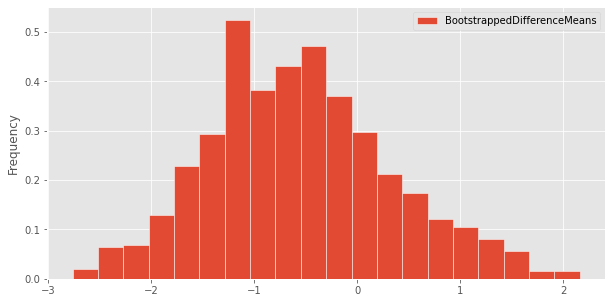

In [58]:
bpd.DataFrame().assign(BootstrappedDifferenceMeans = difference_means).plot(kind = 'hist', density=True, ec='w', bins=20, figsize=(10, 5));

**Question 4.3.** Compute a 95% confidence interval for the difference in mean times (as before, in the order Ciro minus Athu). Assign the left and right endpoints of this confidence interval to `left_endpoint` and `right_endpoint` respectively. 

In [59]:
left_endpoint = np.percentile(difference_means, 2.5)
right_endpoint = np.percentile(difference_means, 97.5)

print('Bootstrapped 95% confidence interval for the mean difference in time to complete the crossword for Ciro and Athu:\n [{:f}, {:f}]'.format(left_endpoint, right_endpoint))

Bootstrapped 95% confidence interval for the mean difference in time to complete the crossword for Ciro and Athu:
 [-2.200000, 1.361000]


In [60]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Based on the confidence interval you've created, would you reject the null hypothesis at the 0.05 significance level? Set `reject_null` to True if you would reject the null hypothesis, and False if you would not.

In [61]:
reject_null = False

In [62]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5.** Consider what would happen if Ciro and Athu collected their times in minutes instead of seconds. Would your confidence interval have the same endpoints either way? Set `same_endpoints` to True or False. Would your hypothesis test still come to the same conclusion either way? Set `same_conclusion` to True or False.

In [63]:
same_endpoints = False
same_conclusion = True

In [64]:
grader.check("q4_5")

q4_5 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Congratulations! You are done with Homework 6 – the final homework of the quarter! 🎉

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
1. Read through the notebook to make sure everything is fine and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [73]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!

q3_8 results: All test cases passed!

q3_9 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!

q4_5 results: All test cases passed!